# Project 4 - due Monday, 12/10 at 1pm


Select a dataset of at least 250,000 records, preferably at the level of individual transactions. Acquire the data, survey it, wrangle it into a suitable format, and analyze it. Present your work in a brief 5-minute talk with additional 1-2 minutes of Q&A in class on Tuesday, 12/11, and write up your process and results in a reproducible notebook.

You may use any of the methods we studied in class: Unix command line tools, relational databases and dimensional models with SQLite or PostgreSQL, or Spark. As much as possible, avoid using tools you may have learned in depth in other classes for data management – we want to see how well you have mastered what you learned in our class. Pandas and R are fine tools, but for this project we want you to focus on using SQL, or pipelines and filters in Unix or pipelines, filters, and dataframes in Spark. The main exception to this rule is for visualization, as noted below in Part 3.

*Attestation*: All project team members should contribute meaningfully to the final results. Please attest to your individual contributions and that each member contributed substantially to the project in your final writeup.

*Deadline*: Monday, 12/10, 1pm. 

Submit your presentation (PDF export), your notebook, and any additionally necessary files like scripts or images together in one zip file to Blackboard. Only one team member should submit on behalf of all members. Submissions via email or any means outside of Blackboard will not be accepted.

## Part 1 Selection

Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and perform an initial exploration to determine which themes you wish to explore. Describe the questions you want to be able to answer with the data, any concerns you have about the data, and any challenges you expect to have to overcome.

We downloaded dataset from Kaggle. The dataset contains UK road accidents from 2005 to 2014, separated in 3 csv files. We calculated the null values and looked into these three datasets, we chose the third one(accident from 12 to 14 in UK) for assignment convenience to analyze because this dataset is more complete than others. We are interested in this dataset because it contains a lot of information for us to analyze traffic accident, such as what course the traffic accident, how serious is the accident, what was the road condition, what was the weather, was there any special conditions when the accident happened. How has different areas differed? There is so much we can explore for these data.

Data Link: https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales#accidents_2005_to_2007.csv


Questions we want to be able to answer with the data:
* 1.Vehicles and Casualties by Accident_Severity and our own cognition about Accident_Severity (our assumption: measure by average ‘Number_of_Vehicles’ and ‘Number_of_Casualties)’
* 2.Accident count peak (by hour, by weekday, by month, by year)
* 3.Average Number_of_Vehicles and Number_of_Casualties in different Road_Surface_Conditions
* 4.Average Number_of_Vehicles and Number_of_Casualties in different Special_Conditions_at_Site
* 5.Average Number_of_Vehicles and Number_of_Casualties in different Carriageway_Hazards
* 6.Vehicles and Casualties by Light_Condition / Weather_Condition
* 7.Severity proportion and frequency in Urban and Rural (1 - Urban, 2 - Rural)
* 8.Top 10 Districts where have most accidents
* 9.Question 9 extension:Vehicles and Casualties by both Light_Condition and Weather_Condition in top 10
* 10.Question 9 extension: The distribution of Road_Type (expect: ‘Slip road’ and ‘Roundabout’ have more’) in top 10
* 11.Distribution of accident in different Speed_limit. (expect: intermediate speed limit has most accidents. Generally, in the road with high-speed limit such as high-speed railway, people tend to pay more attention to driving. As for the road with low-speed limit, it is hard that accident in the road with low-speed limit occurs and some roads with that speed limit means that road could occur accidents frequently in the past, so people may pay fine with high value when they exceed the speed limit.) 

In part 3, we answered these questions follow this order.

Concerns we have about the data:
* We are not sure whether roads have the same speed limit all the time. So we made the assumption in part 2 to assume that roads have only



Challenges we expect to overcome:
    
* Drawing star schema and schema.
* Find the dataset that have column sharing same property of our original dataset


#### Note: When we copy csv file, sometimes we may get error 'cannot allocate memory'. If you get this error, please change to another path of your directory.

### Initial Data Exploration

#### See how many observations in the data

In [1]:
!wget https://s3.amazonaws.com/datamanagement2018fall/accidents_2012_to_2014.csv

--2018-12-09 23:41:53--  https://s3.amazonaws.com/datamanagement2018fall/accidents_2012_to_2014.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.163.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.163.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133627887 (127M) [text/csv]
Saving to: ‘accidents_2012_to_2014.csv’

accidents_2012_to_2 100%[===================>] 127.44M  51.6MB/s    in 2.5s    

2018-12-09 23:41:56 (51.6 MB/s) - ‘accidents_2012_to_2014.csv’ saved [133627887/133627887]



In [2]:
!xsv count accidents_2012_to_2014.csv

464697


There are 464,697 of observations in the data.

#### See the coulmns of this data and attribute of columns

In [3]:
!csvcut -n accidents_2012_to_2014.csv

  1: Accident_Index
  2: Location_Easting_OSGR
  3: Location_Northing_OSGR
  4: Longitude
  5: Latitude
  6: Police_Force
  7: Accident_Severity
  8: Number_of_Vehicles
  9: Number_of_Casualties
 10: Date
 11: Day_of_Week
 12: Time
 13: Local_Authority_(District)
 14: Local_Authority_(Highway)
 15: 1st_Road_Class
 16: 1st_Road_Number
 17: Road_Type
 18: Speed_limit
 19: Junction_Detail
 20: Junction_Control
 21: 2nd_Road_Class
 22: 2nd_Road_Number
 23: Pedestrian_Crossing-Human_Control
 24: Pedestrian_Crossing-Physical_Facilities
 25: Light_Conditions
 26: Weather_Conditions
 27: Road_Surface_Conditions
 28: Special_Conditions_at_Site
 29: Carriageway_Hazards
 30: Urban_or_Rural_Area
 31: Did_Police_Officer_Attend_Scene_of_Accident
 32: LSOA_of_Accident_Location
 33: Year


In [4]:
!head -n 10 accidents_2012_to_2014.csv | csvstat

  1. "Accident_Index"

	Type of data:          Text
	Contains null values:  False
	Unique values:         9
	Longest value:         13 characters
	Most common values:    201201BS70001 (1x)
	                       201201BS70002 (1x)
	                       201201BS70003 (1x)
	                       201201BS70004 (1x)
	                       201201BS70005 (1x)

  2. "Location_Easting_OSGR"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9
	Smallest value:        524,010
	Largest value:         527,780
	Sum:                   4,734,730
	Mean:                  526,081.111
	Median:                526,090
	StDev:                 1,307.444
	Most common values:    527,200 (1x)
	                       524,930 (1x)
	                       525,860 (1x)
	                       524,980 (1x)
	                       526,170 (1x)

  3. "Location_Northing_OSGR"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9
	Smallest value: 

#### See some of the data and find the null values

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('accidents_2012_to_2014.csv')

/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [7]:
data.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

# Part 2 Wrangling

Based on what you found above, wrangle the data into a format suitable for analysis. This may involve cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your process as you proceed, and document any scripts, databases, or other models you develop. Be specific about any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make about the meaning of variables and their values.
Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional model, ensure that the fact table contains the right number of records).

# Our Wrangling part consists of 3 steps

## Step 1 
Change ‘date’ from string to data
* data['Date'] = [datetime.strptime(datestr,'%d/%m/%Y') for datestr in data['Date']]


## Step 2
Drop Columns and reasons of dropping the columns:
* a.Location_Easting_OSGR,Location_Northing_OSGR: the variables will not help to solve the issues in which we are interested.
* b.Police_Force: at first we consider this useful because we think that this column means how many police officers are there when accident happened. However, when we explore this column using the code: pd.data.groupby(‘Police_Force’)[‘Police_Force’].count(), we think that this may represent the district of police being sent to the accident scene. Therefore, we think this column cannot solve the question in which we are interested and Local_Authority_(District) have almost same attribute to represent attribute of location.
* c.1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number: the variables will not help to solve the issues in which we are interested.
* d.Junction_Detail: all rows in this column are NULL.
* e.Junction_Control: too many NULL values in this column.
* f.Pedestrian_Crossing-Human_Control: the variables will not help to solve the issues in which we are interested.
* g.Pedestrian_Crossing_Physical_Facilities: at first, we are very interested in this variable because those facilities may reduce the accident that car bumps people. However, in this dataset we cannot get the information of accident type. For example, car bumps car or car bumps human or car bumps other things. Therefore, if the type of accident is not related to people and car,  we consider this column useless.
* H.Did_Police_Officer_Attend_Scene_of_Accident: the variables will not help to solve the issues in which we are interested.

We drop these colums at the end of part 2


## Step 3 
* Update null value in columns when creating dimensional tables : time, road_surface_condition, special_condition, carriageway_hazards, lsoa, region
* Add new column ‘region’ in original dataset for further analysis.


# Assumptions

* Speed-limit: We assume that speed limit of some districts will not change because of specific time interval. Speed limit of district will remain constant at that district.
* Special_Conditions_at_Site: We assume that special condition depends on the time not the district.
* What we define urban or rural (using tableau to map all accident location),
There is no definition in the website about urban or rural area and the column of ‘urban_or_rural’ have to values(1 and 2), so we use tableau to deduce the definition. First, we map all accident location and we use ‘urban_or_rural’ as filter. When we looked at all locations of accident in group 1, dots are aggregated in several places. However, when we looked at all locations of accident in group 2, dots are evenly distributed throughout the U.K. Therefore, we assumed that 1 denotes urban and 2 denoted rural.


#### Change the type of column 'Date' from string to timstamp

In [8]:
from datetime import datetime

In [9]:
data['Date'] = [datetime.strptime(datestr,'%d/%m/%Y') for datestr in data['Date']]

#### Link to postgresql and import csv file into it

In [10]:
data.to_csv('accidents.csv',index=None)

In [11]:
%load_ext sql

In [12]:
!dropdb -U student project4

In [13]:
!createdb -U student project4

In [14]:
%sql postgresql://student@/project4

'Connected: student@project4'

In [15]:
%%sql
DROP TABLE IF EXISTS accidents ;

CREATE TABLE accidents (
    index VARCHAR(50),
    easting_osgr NUMERIC,
    northing_osgr NUMERIC,
    longitude NUMERIC,
    latitude NUMERIC,
    police_force VARCHAR(50),
    severity NUMERIC,
    number_vehicles NUMERIC,
    number_casualties NUMERIC,
    date TIMESTAMP,
    day_week NUMERIC,
    time TIME,
    district NUMERIC,
    highway VARCHAR(50),
    first_road_class NUMERIC,
    first_road_number NUMERIC,
    road_type VARCHAR(100),
    speed_limit NUMERIC,
    junction_detail VARCHAR(10),
    junction_control VARCHAR(100),
    second_road_class NUMERIC,
    second_road_number NUMERIC,
    pedestrian_crossing_human_control VARCHAR(100),
    pedestrian_crossing_physical_facilities VARCHAR(100),
    light_conditions VARCHAR(100),
    weather_condition VARCHAR(100),
    road_surface_condition VARCHAR(50),
    special_condition VARCHAR(50),
    carriageway_hazards VARCHAR(50),
    urban_or_rural VARCHAR(50),
    did_police_attend BOOLEAN,
    lsoa VARCHAR(50),
    year NUMERIC
)

 * postgresql://student@/project4
Done.
Done.


[]

#### Note: if you get error 'cannot allocate memory', please change to another path.

In [16]:
!cp accidents.csv /tmp/accidents.csv

In [17]:
%%sql
COPY accidents
FROM '/tmp/accidents.csv'
CSV
HEADER;

 * postgresql://student@/project4
464697 rows affected.


[]

In [18]:
%%sql
SELECT * from accidents LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


index,easting_osgr,northing_osgr,longitude,latitude,police_force,severity,number_vehicles,number_casualties,date,day_week,time,district,highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_condition,road_surface_condition,special_condition,carriageway_hazards,urban_or_rural,did_police_attend,lsoa,year
201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,2012-01-19 00:00:00,5,20:35:00,12,E09000020,3,308,Single carriageway,30,None,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,True,E01002821,2012
201201BS70002,524930,181430,-0.20083800000000002,51.517931,1,3,2,1,2012-01-04 00:00:00,4,17:00:00,1,E09000033,4,412,Single carriageway,30,None,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,True,E01004760,2012
201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,2012-01-10 00:00:00,3,10:07:00,12,E09000020,3,3220,One way street,30,None,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,True,E01002893,2012
201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,2012-01-18 00:00:00,4,12:20:00,12,E09000020,5,0,Single carriageway,30,None,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,True,E01002886,2012
201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,2012-01-17 00:00:00,3,20:24:00,12,E09000020,4,325,Single carriageway,30,None,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,True,E01002890,2012


#### Import another dataset to check specific lsoa(Lower Layer Super Output Area) in table 'accidents' belongs to what UK region(local authority)

Data link:http://geoportal.statistics.gov.uk/datasets/output-area-to-lsoa-to-msoa-to-local-authority-district-december-2017-lookup-with-area-classifications-in-great-britain/data

In [19]:
!wget https://s3.amazonaws.com/istm/Output_Area_to_Lower_Layer_Super_Output_Area_to_Middle_Layer_Super_Output_Area_to_Local_Authority_District_December_2017_Lookup_in_Great_Britain__Classification_Version_2.csv

--2018-12-09 23:55:25--  https://s3.amazonaws.com/istm/Output_Area_to_Lower_Layer_Super_Output_Area_to_Middle_Layer_Super_Output_Area_to_Local_Authority_District_December_2017_Lookup_in_Great_Britain__Classification_Version_2.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.110.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.110.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49727466 (47M) [text/csv]
Saving to: ‘Output_Area_to_Lower_Layer_Super_Output_Area_to_Middle_Layer_Super_Output_Area_to_Local_Authority_District_December_2017_Lookup_in_Great_Britain__Classification_Version_2.csv’

Output_Area_to_Lowe 100%[===================>]  47.42M  56.8MB/s    in 0.8s    

2018-12-09 23:55:26 (56.8 MB/s) - ‘Output_Area_to_Lower_Layer_Super_Output_Area_to_Middle_Layer_Super_Output_Area_to_Local_Authority_District_December_2017_Lookup_in_Great_Britain__Classification_Version_2.csv’ saved [49727466/49727466]



In [20]:
outputArea = pd.read_csv('Output_Area_to_Lower_Layer_Super_Output_Area_to_Middle_Layer_Super_Output_Area_to_Local_Authority_District_December_2017_Lookup_in_Great_Britain__Classification_Version_2.csv')

In [21]:
outputArea.head()

,OA11CD,OAC11CD,OAC11NM,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,RGN11CD,RGN11NM,CTRY11CD,CTRY11NM,FID
0,E00070834,1a2,Established Farming Communities,E01014030,Herefordshire 009D,2b,Prospering countryside life,E02002913,Herefordshire 009,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11001
1,E00070835,1a2,Established Farming Communities,E01014028,Herefordshire 009B,2a,Ageing rural neighbourhoods,E02002913,Herefordshire 009,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11002
2,E00070837,1a2,Established Farming Communities,E01014027,Herefordshire 009A,2c,Remoter communities,E02002913,Herefordshire 009,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11003
3,E00070907,1a2,Established Farming Communities,E01014044,Herefordshire 002D,2d,Rural traits,E02002906,Herefordshire 002,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11004
4,E00070937,1a2,Established Farming Communities,E01014050,Herefordshire 023D,2c,Remoter communities,E02002927,Herefordshire 023,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11005


##### Name the new dataset 'areaTransfer'

In [22]:
areaTransfer = outputArea.loc[:,['LSOA11CD','LAD17NM']].drop_duplicates()

In [23]:
areaTransfer.to_csv('areaTransfer.csv',index=None)

#### Note: if you get error 'cannot allocate memory', please change to another path.

In [24]:
!cp areaTransfer.csv /tmp/areaTransfer.csv

In [25]:
%%sql 
DROP TABLE IF EXISTS areaTransfer;

CREATE TABLE areaTransfer(
    LSOACD VARCHAR(50),
    LA VARCHAR(50)
);

 * postgresql://student@/project4
Done.
Done.


[]

#### Note: if you get error 'cannot allocate memory', please change to another path.

In [26]:
%%sql
COPY areaTransfer 
FROM '/tmp/areaTransfer.csv'
CSV
HEADER
;

 * postgresql://student@/project4
41729 rows affected.


[]

#### The below is checking the number of null values of lsoa in accidents table after left join with areaTransfer

In [27]:
%%sql
SELECT COUNT(*)
FROM(SELECT accidents.lsoa, areaTransfer.LSOACD, areaTransfer.LA
     FROM accidents
     LEFT OUTER JOIN areaTransfer
     ON accidents.lsoa = areaTransfer.LSOACD) AS foo
WHERE foo.lsoa IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
28718


The number of null values is 28718.

### Note: the below code is checking the value that LSOACD(lsoa code) in 'areaTransfer' cannot find the match in lsoa of table 'accidents'.

In [28]:
%%sql
SELECT COUNT(*)
FROM(SELECT accidents.lsoa, areaTransfer.LSOACD, areaTransfer.LA
     FROM accidents
     LEFT OUTER JOIN areaTransfer
     ON accidents.lsoa = areaTransfer.LSOACD) AS foo
WHERE foo.la IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
37943


The number is 37943 that LSOA code cannot match with lsoa in table 'accidents'.

Therefore, the number is 9225 (37943 - 28718) that 'LSOACD' in 'areaTransfer' cannot match with 'lsoa' in table 'accidents'.

#### Add new column region in table 'accidents'

In [29]:
%%sql
ALTER TABLE accidents
ADD COLUMN REGION VARCHAR(100);

 * postgresql://student@/project4
Done.


[]

In [30]:
%%sql
SELECT * from accidents LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


index,easting_osgr,northing_osgr,longitude,latitude,police_force,severity,number_vehicles,number_casualties,date,day_week,time,district,highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_condition,road_surface_condition,special_condition,carriageway_hazards,urban_or_rural,did_police_attend,lsoa,year,region
201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,2012-01-19 00:00:00,5,20:35:00,12,E09000020,3,308,Single carriageway,30,None,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,True,E01002821,2012,None
201201BS70002,524930,181430,-0.20083800000000002,51.517931,1,3,2,1,2012-01-04 00:00:00,4,17:00:00,1,E09000033,4,412,Single carriageway,30,None,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,True,E01004760,2012,None
201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,2012-01-10 00:00:00,3,10:07:00,12,E09000020,3,3220,One way street,30,None,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,True,E01002893,2012,None
201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,2012-01-18 00:00:00,4,12:20:00,12,E09000020,5,0,Single carriageway,30,None,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,True,E01002886,2012,None
201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,2012-01-17 00:00:00,3,20:24:00,12,E09000020,4,325,Single carriageway,30,None,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,True,E01002890,2012,None


In [31]:
%%sql
UPDATE accidents
SET region = areaTransfer.LA
FROM areaTransfer
WHERE accidents.lsoa IS NOT NULL
AND accidents.lsoa = areaTransfer.LSOACD;

 * postgresql://student@/project4
426754 rows affected.


[]

As we can see, the number of affected rows is 426754, the number that is 464697(the all rows) minus 37043(the number that LSOA code cannot match with lsoa
in table 'accident').

For example, there is lsoa 'E01000004' in accidents table but that lsoa cannot be found in LSOA code.

In [32]:
%%sql
SELECT * FROM areaTransfer
WHERE LSOACD = 'E01000004'
LIMIT 5;

 * postgresql://student@/project4
0 rows affected.


lsoacd,la


## After wrangling the data, next we base on our star schema to create dimensional database. 

## Our star schema

In [74]:
from IPython.display import Image
Image(url="https://i.ibb.co/s6RQJwN/Screen-Shot-2018-12-07-at-6-34-29-PM.png")

## we follow these steps to create our dimensional tables
* Step1: create new dimension table
* Step2: insert value into the dimension table from fact table
* Step3: add new column 'key'(dimension key) into fact table
* Step4: check whether there are null values in tables and assign value to null values
* Step5: update value 'key' in fact table based on dimension table

### Dimensional Table (date)

#### Create table named 'date'

In [33]:
%%sql
DROP TABLE IF EXISTS date;

CREATE TABLE date (
    date_key SERIAL PRIMARY KEY,
    date TIMESTAMP,
    year NUMERIC,
    month VARCHAR(10),
    day VARCHAR(10),
    day_of_week NUMERIC,
    time TIME
);

 * postgresql://student@/project4
Done.
Done.


[]

#### Insert value into table 'date' from table 'accidents'

In [34]:
%%sql
INSERT INTO date (date, year, month, day, day_of_week, time)
SELECT DISTINCT date, year, TO_CHAR(date,'MM'), TO_CHAR(date,'DD'), day_week, time
FROM accidents;

 * postgresql://student@/project4
283723 rows affected.


[]

See some of the values.

In [35]:
%%sql
SELECT * FROM date
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


date_key,date,year,month,day,day_of_week,time
1,2012-01-01 00:00:00,2012,01,01,1,00:04:00
2,2012-01-01 00:00:00,2012,01,01,1,00:05:00
3,2012-01-01 00:00:00,2012,01,01,1,00:09:00
4,2012-01-01 00:00:00,2012,01,01,1,00:15:00
5,2012-01-01 00:00:00,2012,01,01,1,00:30:00


#### Add new attribute date_key in accidents table

In [36]:
%%sql
ALTER TABLE accidents
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date_key
    FOREIGN KEY (date_key)
    REFERENCES date (date_key);

 * postgresql://student@/project4
Done.


[]

#### Check whether there is null value in each attributes

In [37]:
%%sql
SELECT COUNT(*)
FROM date
WHERE date IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
0


In [38]:
%%sql
SELECT COUNT(*)
FROM date
WHERE year IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
0


In [39]:
%%sql
SELECT COUNT(*)
FROM date
WHERE month IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
0


In [40]:
%%sql
SELECT COUNT(*)
FROM date
WHERE day IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
0


In [41]:
%%sql
SELECT COUNT(*)
FROM date
WHERE day_of_week IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
0


In [42]:
%%sql
SELECT COUNT(*)
FROM date
WHERE time IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
13


There is 13 null values in attirbute time, so we need to update the information to prevent error of connecting the relationship 
between fact table and dimension table.

In [43]:
%%sql
UPDATE date
SET time = '00:00:59'
WHERE time IS NULL;

 * postgresql://student@/project4
13 rows affected.


[]

Since in our data, each values in attirbute time does not have 'second', we can assign second in time so that we know originally it is null value.

Next, we also update the information of accidents table.

In [44]:
%%sql
UPDATE accidents
SET time = '00:00:59'
WHERE time IS NULL;

 * postgresql://student@/project4
13 rows affected.


[]

#### Finally, update information date_key in accidents table 

In [45]:
%%sql
UPDATE accidents
SET date_key = date.date_key
FROM date
WHERE accidents.date = date.date
    AND accidents.day_week = date.day_of_week
    AND accidents.time = date.time
    AND accidents.year = date.year;

 * postgresql://student@/project4
464697 rows affected.


[]

In [46]:
%%sql
SELECT * from accidents
WHERE region IS NULL
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


index,easting_osgr,northing_osgr,longitude,latitude,police_force,severity,number_vehicles,number_casualties,date,day_week,time,district,highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_condition,road_surface_condition,special_condition,carriageway_hazards,urban_or_rural,did_police_attend,lsoa,year,region,date_key
2.01E+12,352720,702580,-2.7638689999999997,56.213488,94,2,2,3,2012-09-02 00:00:00,1,12:36:00,925,S12000015,4,942,Single carriageway,60,None,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,True,None,2012,None,62103
201391NM12610,281048,803636,-3.96559,57.10831700000001,91,3,1,1,2013-12-19 00:00:00,5,12:36:00,927,S12000017,3,9,Single carriageway,60,None,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Snowing with high winds,Snow,None,None,2,True,None,2013,None,184245
2.01E+12,326810,675600,-3.1741349999999997,55.967847,95,3,1,1,2012-02-16 00:00:00,5,12:37:00,923,S12000036,3,900,Single carriageway,30,None,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,True,None,2012,None,11462
201391NM12132,295826,820760,-3.7288989999999997,57.26566,91,3,2,2,2013-12-05 00:00:00,5,12:37:00,927,S12000017,3,95,Single carriageway,60,None,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Snowing with high winds,Snow,None,None,2,True,None,2013,None,180286
2.01E+12,371678,635307,-2.451152,55.610569999999996,95,3,2,1,2014-04-05 00:00:00,7,12:37:00,914,S12000026,4,6364,Dual carriageway,60,None,Giveway or uncontrolled,3,6089,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,True,None,2014,None,211333


### Dimensional Table (condition)

We didn't put markdowns for dimensional table(condition) because the steps are same as what we did for dimensional table(data).

In [47]:
%%sql
DROP TABLE IF EXISTS condition;

CREATE TABLE condition (
    condition_key SERIAL PRIMARY KEY,
    light_conditions VARCHAR(250),
    weather_condition VARCHAR(250),
    road_surface_condition VARCHAR(50),
    special_condition VARCHAR(250),
    carriageway_hazards VARCHAR(250)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [48]:
%%sql
INSERT INTO condition (light_conditions, weather_condition, road_surface_condition, special_condition, carriageway_hazards )
SELECT DISTINCT light_conditions, weather_condition, road_surface_condition, special_condition, carriageway_hazards
FROM accidents;

 * postgresql://student@/project4
1038 rows affected.


[]

In [49]:
%%sql
ALTER TABLE accidents
ADD COLUMN condition_key INTEGER,
ADD CONSTRAINT fk_condition_key
    FOREIGN KEY (condition_key)
    REFERENCES condition (condition_key);

 * postgresql://student@/project4
Done.


[]

In [50]:
%%sql
SELECT COUNT(*)
FROM accidents
WHERE road_surface_condition IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
755


In [51]:
%%sql
SELECT COUNT(*)
FROM accidents
WHERE special_condition IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
2


In [52]:
%%sql
SELECT COUNT(*)
FROM accidents
WHERE carriageway_hazards IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
3


In [53]:
%%sql
UPDATE accidents
SET road_surface_condition = 'unknown'
WHERE road_surface_condition IS NULL;

UPDATE accidents
SET special_condition = 'unknown'
WHERE special_condition IS NULL;

UPDATE accidents
SET carriageway_hazards = 'unknown'
WHERE carriageway_hazards IS NULL;

 * postgresql://student@/project4
755 rows affected.
2 rows affected.
3 rows affected.


[]

In [54]:
%%sql
SELECT COUNT(*)
FROM condition
WHERE road_surface_condition IS NULL;

SELECT COUNT(*)
FROM condition
WHERE special_condition IS NULL;

SELECT COUNT(*)
FROM condition
WHERE carriageway_hazards IS NULL;

 * postgresql://student@/project4
1 rows affected.
1 rows affected.
1 rows affected.


count
3


In [55]:
%%sql
UPDATE condition
SET road_surface_condition = 'unknown'
WHERE road_surface_condition IS NULL;

UPDATE condition
SET special_condition = 'unknown'
WHERE special_condition IS NULL;

UPDATE condition
SET carriageway_hazards = 'unknown'
WHERE carriageway_hazards IS NULL;

 * postgresql://student@/project4
39 rows affected.
2 rows affected.
3 rows affected.


[]

In [56]:
%%sql
UPDATE accidents
SET condition_key = condition.condition_key
FROM condition
WHERE accidents.weather_condition = condition.weather_condition
    AND accidents.light_conditions = condition.light_conditions
    AND accidents.road_surface_condition = condition.road_surface_condition
    AND accidents.special_condition = condition.special_condition
    AND accidents.carriageway_hazards = condition.carriageway_hazards;

 * postgresql://student@/project4
464697 rows affected.


[]

### Dimensional Table (road)
We didn't put markdowns for dimensional table(road) because the steps are same as what we did for dimensional table(data).

In [57]:
%%sql
DROP TABLE IF EXISTS road;

CREATE TABLE road (
    road_key SERIAL PRIMARY KEY,
    road_type VARCHAR(100),
    speed_limit NUMERIC
);

 * postgresql://student@/project4
Done.
Done.


[]

In [58]:
%%sql
INSERT INTO road (road_type,speed_limit)
SELECT DISTINCT road_type,speed_limit
FROM accidents;

 * postgresql://student@/project4
35 rows affected.


[]

In [59]:
%%sql
ALTER TABLE accidents
ADD COLUMN road_key INTEGER,
ADD CONSTRAINT fk_road_key
    FOREIGN KEY (road_key)
    REFERENCES road (road_key);

 * postgresql://student@/project4
Done.


[]

In [60]:
data.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

According to the result shown above, we can see there is no null values in road_type and speed_limit.

In [61]:
%%sql
UPDATE accidents
SET road_key = road.road_key
FROM road
WHERE accidents.road_type = road.road_type
    AND accidents.speed_limit = road.speed_limit;

 * postgresql://student@/project4
464697 rows affected.


[]

### Dimensional Table (location)
We didn't put markdowns for dimensional table(location) because the steps are same as what we did for dimensional table(data).

In [62]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location(
    location_key SERIAL PRIMARY KEY,
    district NUMERIC,
    highway VARCHAR(50),
    urban_or_rural VARCHAR(50),
    latitude NUMERIC,
    longitude NUMERIC,
    lsoa VARCHAR(50),
    region VARCHAR(100)
)

 * postgresql://student@/project4
Done.
Done.


[]

In [63]:
%%sql
INSERT INTO location (district, highway, urban_or_rural, latitude, longitude, lsoa, region)
SELECT DISTINCT district, highway, urban_or_rural, latitude, longitude, lsoa, region
FROM accidents;

 * postgresql://student@/project4
408927 rows affected.


[]

In [64]:
%%sql
ALTER TABLE accidents
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location_key
    FOREIGN KEY (location_key)
    REFERENCES location (location_key);

 * postgresql://student@/project4
Done.


[]

In [65]:
data.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [66]:
%%sql
SELECT COUNT(*) FROM accidents
WHERE region IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
37943


In [67]:
%%sql
SELECT COUNT(*) FROM accidents
WHERE lsoa IS NULL;

 * postgresql://student@/project4
1 rows affected.


count
28718


In [68]:
%%sql
UPDATE location
SET region = 'unknown'
WHERE region IS NULL;

UPDATE location
SET lsoa = 'unknown'
WHERE lsoa IS NULL;

 * postgresql://student@/project4
35148 rows affected.
28113 rows affected.


[]

In [69]:
%%sql
UPDATE accidents
SET region = 'unknown'
WHERE region IS NULL;

UPDATE accidents
SET lsoa = 'unknown'
WHERE lsoa IS NULL;

 * postgresql://student@/project4
37943 rows affected.
28718 rows affected.


[]

In [70]:
%%sql
UPDATE accidents
SET location_key = location.location_key
FROM location
WHERE accidents.district = location.district
    AND accidents.highway = location.highway
    AND accidents.urban_or_rural = location.urban_or_rural
    AND accidents.latitude = location.latitude
    AND accidents.longitude = location.longitude
    AND accidents.lsoa = location.lsoa
    AND accidents.region = location.region;

 * postgresql://student@/project4
464697 rows affected.


[]

### Fact Table (accidents)

#### After adding dimensional attributes into other dimension tables, we can drop those attributes out of fact table and keep their key.
#### In addition, we also dop attributes we do not want during this part.

#### we mentioned the reasons we drop specific attributes at the beginning of part 2

In [71]:
%%sql
ALTER TABLE accidents
DROP COLUMN index,
DROP COLUMN easting_osgr,
DROP COLUMN northing_osgr,
DROP COLUMN longitude,
DROP COLUMN latitude,
DROP COLUMN district,
DROP COLUMN highway,
DROP COLUMN special_condition,
DROP COLUMN carriageway_hazards,
DROP COLUMN region,
DROP COLUMN police_force,
DROP COLUMN first_road_class,
DROP COLUMN first_road_number,
DROP COLUMN second_road_class,
DROP COLUMN second_road_number,
DROP COLUMN junction_detail,
DROP COLUMN junction_control,
DROP COLUMN pedestrian_crossing_human_control,
DROP COLUMN pedestrian_crossing_physical_facilities,
DROP COLUMN road_surface_condition,
DROP COLUMN did_police_attend,
DROP COLUMN lsoa,
DROP COLUMN date,
DROP COLUMN day_week,
DROP COLUMN time,
DROP COLUMN road_type,
DROP COLUMN speed_limit,
DROP COLUMN light_conditions,
DROP COLUMN weather_condition,
DROP COLUMN urban_or_rural,
DROP COLUMN year;

 * postgresql://student@/project4
Done.


[]

In [78]:
%%sql
SELECT * FROM accidents
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


severity,number_vehicles,number_casualties,date_key,condition_key,road_key,location_key
3,4,2,209346,407,20,330138
2,1,1,345,779,20,330099
3,1,1,171655,558,20,330445
3,2,1,165983,366,20,330380
2,1,1,165931,368,20,330136


# Part 3 Analysis

Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1 with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover, discussing them and whether the results match your expectations. Include charts or other visuals that support your analysis. You may use Tableau, matplotlib, ggplot, or other tools we have not covered in class for visualization (and only for visualization), but be sure to export images from those tools and to include any images properly in your notebook writeup and slides.

## Analysis 1
## Average number of vehicles and number of casualties in different accident severity

#### Expectation: we expect the more serious the accident is, the more vehicles and casualties are involoved.

According to the description in original website, 1 = Fatal, 2 = Serious, 3 = Slight.

In [72]:
%%sql
SELECT severity, COUNT(severity) AS frequency, ROUND(AVG(number_vehicles),2) AS avergae_vehicles, ROUND(AVG(number_casualties),2) AS avergae_casualties
FROM accidents
GROUP BY severity
ORDER BY severity;

 * postgresql://student@/project4
3 rows affected.


severity,frequency,avergae_vehicles,avergae_casualties
1,5303,1.75,1.77
2,66784,1.68,1.40
3,392610,1.85,1.32


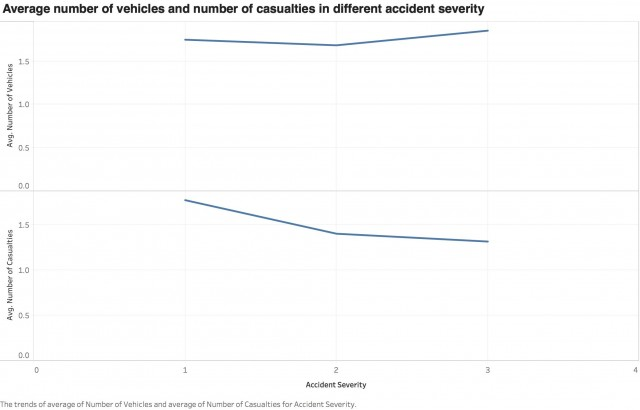

In [75]:
Image("https://i.ibb.co/q1Y9Zdd/Sheet-14.jpg")

In [76]:
Image(url="https://i.ibb.co/whMj6hj/avg-no.png")

As the severity is more serious, the average casualties increases but average vehicles does not.

## Analysis 2
## See the distribution of accident frequency to find the peak time (by hour, by weekday, by month, by year).

* Year

In [77]:
%matplotlib inline

In [78]:
%%sql
SELECT date.year, COUNT(*) as accident_count
FROM accidents
LEFT JOIN date
ON date.date_key=accidents.date_key
GROUP BY date.year
ORDER BY accident_count DESC
LIMIT 10

 * postgresql://student@/project4
3 rows affected.


year,accident_count
2012,179715
2014,146322
2013,138660


<BarContainer object of 3 artists>

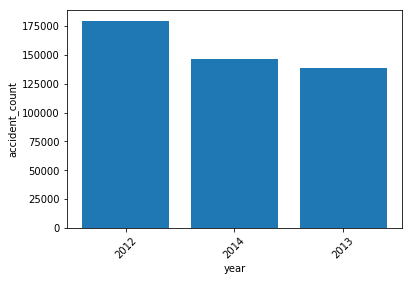

In [79]:
_.bar()

AS we can see from the bar graph, in 2012, there has the most accidents. This may due to the insufficiencies of traffic regulation in earlier time.

* Month

In [80]:
%%sql
SELECT date.month, COUNT(*) as accident_count
FROM accidents
LEFT JOIN date
ON date.date_key=accidents.date_key
GROUP BY date.month
ORDER BY date.month
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


month,accident_count
01,37299
02,34247
03,37589
04,34600
05,39016
06,38387
07,41682
08,38292
09,39780
10,42810


<BarContainer object of 10 artists>

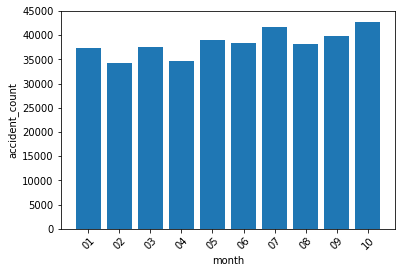

In [81]:
_.bar()

Generally, there is no much difference of accidents count between different months.

* Day of week

In [82]:
%%sql
SELECT date.day_of_week, COUNT(*) as accident_count
FROM accidents
LEFT JOIN date
ON date.date_key=accidents.date_key
GROUP BY date.day_of_week
ORDER BY date.day_of_week
LIMIT 10

 * postgresql://student@/project4
7 rows affected.


day_of_week,accident_count
1,50304
2,66725
3,70316
4,69835
5,70644
6,76054
7,60819


<BarContainer object of 7 artists>

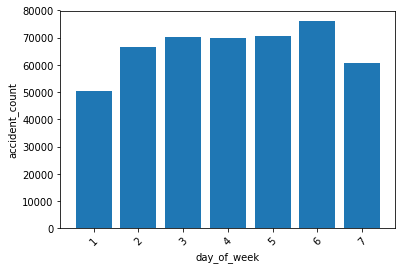

In [86]:
_.bar()

On Friday, there are the most number of accidents while on Sunday, there are the least. We presume that on Sunday, people are more energetic and concentrated during driving after a whole weekend of rest. In addition, people may prefer to stay at one place to have a rest because they don't have to work. However, on Friday, people would be tired after five weekdays of work, and they may go to party night, happy hour to drink. Both tiredness and alcohol will lead to accidents.

* Hour

Note: because we set the null value of time to '00:00:59' we must exclude them so as not to affect the calculation of aggregate function which
will ignore null values.

In [83]:
%%sql
SELECT DISTINCT TO_CHAR(date.time,'HH24') AS hour, COUNT(*) as frequency
FROM accidents
LEFT JOIN date
ON date.date_key=accidents.date_key
WHERE date.time != '00:00:59'
GROUP BY hour
ORDER BY frequency DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


hour,frequency
17,42286
16,37895
15,36118
08,34305
18,33032
14,28192
13,27851
12,27693
11,24706
19,23600


<BarContainer object of 10 artists>

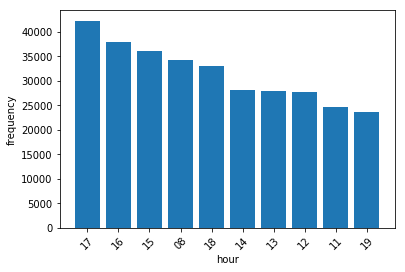

In [84]:
_.bar()

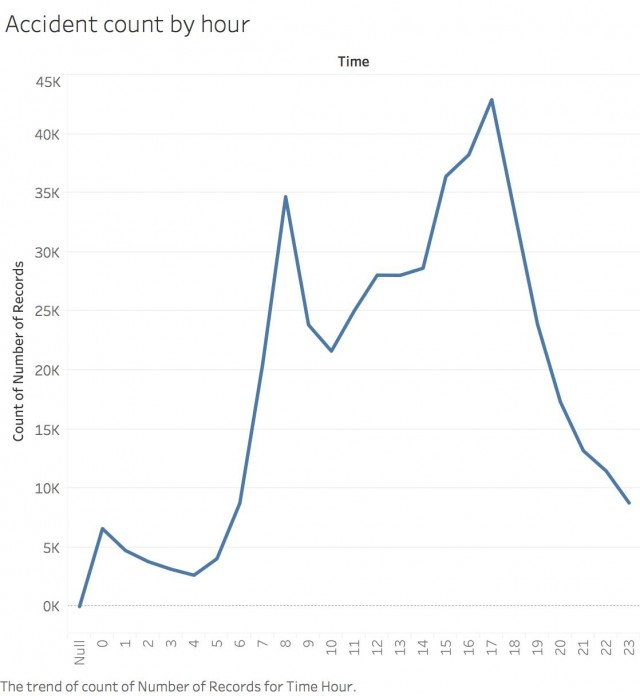

In [85]:
from IPython.display import Image
Image("https://i.ibb.co/S7vg1Gs/Sheet-3.jpg")

It seems that there are two accident peak time, 7 a.m to 9 a.m and 4 p.m to 7 p.m. Those two time periods are rush hours for people who work and study. So there would be more traffic, and this may lead to more accidents.

* General analysis

In [89]:
%%sql
SELECT date.year, TO_CHAR(date.time,'HH24') AS hour, COUNT(*) AS frequency FROM accidents
JOIN date
ON accidents.date_key = date.date_key
WHERE date.time != '00:00:59'
GROUP BY date.year, TO_CHAR(date.time,'HH24')
ORDER BY date.year, TO_CHAR(date.time,'HH24');

 * postgresql://student@/project4
72 rows affected.


year,hour,frequency
2012,00,2567
2012,01,1881
2012,02,1579
2012,03,1277
2012,04,1050
2012,05,1488
2012,06,3225
2012,07,7600
2012,08,13380
2012,09,9089


<BarContainer object of 72 artists>

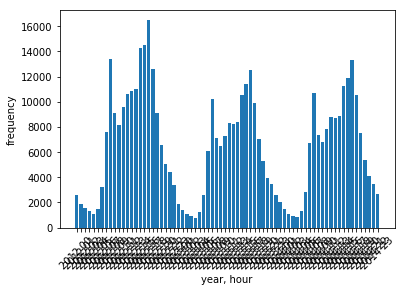

In [90]:
_.bar()

## Analysis 3
## Average number of vehicles and number of casualties in different road surface conditions.

#### Expectation: we consider the Frost/Ice or Wet/Damp will have highest average number of vehicles or number of casualties.

See the table of condition.

In [91]:
%%sql
SELECT * FROM condition
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


condition_key,light_conditions,weather_condition,road_surface_condition,special_condition,carriageway_hazards
1,Daylight: Street light present,Snowing without high winds,Snow,None,Other object in carriageway
2,Darkness: Street lights present but unlit,Fine without high winds,Dry,None,Any animal (except a ridden horse)
3,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,Permanent sign or marking defective or obscured,None
4,Darkeness: No street lighting,Snowing without high winds,Snow,None,Involvement with previous accident
5,Daylight: Street light present,Snowing without high winds,Wet/Damp,Mud,None


See the type of road surface condition as well as the frequency.

In [92]:
%%sql
SELECT condition.road_surface_condition, COUNT(*) FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY condition.road_surface_condition
ORDER BY COUNT(*) DESC;

 * postgresql://student@/project4
6 rows affected.


road_surface_condition,count
Dry,319370
Wet/Damp,132745
Frost/Ice,8140
Snow,2824
Flood (Over 3cm of water),863
unknown,755


In [93]:
Image(url="https://i.ibb.co/mbbjtBt/road1.png")

Wee can see most accidents happened when the road surface is Wet/Damp.

In [94]:
%%sql
SELECT condition.road_surface_condition, ROUND(AVG(accidents.number_casualties),2) AS avg_casualties , ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
WHERE condition.road_surface_condition != 'unknown'
GROUP BY condition.road_surface_condition
ORDER BY AVG(accidents.number_casualties)DESC, AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
5 rows affected.


road_surface_condition,avg_casualties,avg_vehicles
Flood (Over 3cm of water),1.41,1.53
Wet/Damp,1.37,1.81
Snow,1.36,1.72
Frost/Ice,1.34,1.60
Dry,1.32,1.84


In [95]:
Image(url="https://i.ibb.co/DLqkjZH/road2.png")

Note: because we set the null value of road_surface_condition to 'unknown' we must exclude them so as not to affect the calculation of aggregate function which will ignore null values.

In [96]:
%%sql
SELECT condition.road_surface_condition, ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
WHERE condition.road_surface_condition != 'unknown'
GROUP BY condition.road_surface_condition
ORDER BY AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
5 rows affected.


road_surface_condition,avg_vehicles
Dry,1.84
Wet/Damp,1.81
Snow,1.72
Frost/Ice,1.60
Flood (Over 3cm of water),1.53


It is very interesting that the all results do not match with our expectations. 

Flood has most average casualties but lowest vehicles.

Wet/Damp both are in second place.

Dry is also interesting. It has highest vehicles but lowest casaulties.

## Analysis 4
## Average number of vehicles and number of casualties in different special conditions

#### Expectation: we consider the Road surface defective or Permanent sign or marking defective or obscured will have highest average number of vehicles or number of casualties

See the table of condition.

In [97]:
%%sql
SELECT * FROM condition
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


condition_key,light_conditions,weather_condition,road_surface_condition,special_condition,carriageway_hazards
1,Daylight: Street light present,Snowing without high winds,Snow,None,Other object in carriageway
2,Darkness: Street lights present but unlit,Fine without high winds,Dry,None,Any animal (except a ridden horse)
3,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,Permanent sign or marking defective or obscured,None
4,Darkeness: No street lighting,Snowing without high winds,Snow,None,Involvement with previous accident
5,Daylight: Street light present,Snowing without high winds,Wet/Damp,Mud,None


See the type of special condition as well as the frequency.

In [98]:
%%sql
SELECT condition.special_condition, COUNT(*) FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY special_condition
ORDER BY COUNT(*) DESC;

 * postgresql://student@/project4
9 rows affected.


special_condition,count
None,454385
Roadworks,4742
Mud,1413
Ol or diesel,1406
Road surface defective,1144
Auto traffic singal out,758
Permanent sign or marking defective or obscured,625
Auto traffic signal partly defective,222
unknown,2


In [99]:
Image(url="https://i.ibb.co/K5NHh5P/special1.png")

The result above shows us that if there is special condition, accidents happened most when the special condition is Roadworks.

Note: In here, 'None' is not null value, whereas 'unknown' is. None means there is no special condition.

In [100]:
%%sql
SELECT condition.special_condition, ROUND(AVG(accidents.number_casualties),2) AS avg_casualties , ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
WHERE condition.special_condition != 'unknown'
GROUP BY condition.special_condition
ORDER BY AVG(accidents.number_casualties)DESC, AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
8 rows affected.


special_condition,avg_casualties,avg_vehicles
Permanent sign or marking defective or obscured,1.55,1.88
Auto traffic signal partly defective,1.52,1.89
Auto traffic singal out,1.44,1.91
Roadworks,1.40,2.04
Ol or diesel,1.38,1.56
Mud,1.35,1.46
None,1.33,1.83
Road surface defective,1.22,1.43


In [101]:
Image(url="https://i.ibb.co/rpqkWw8/special2.png")

In [102]:
%%sql
SELECT condition.special_condition, ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
WHERE condition.special_condition != 'unknown'
GROUP BY condition.special_condition
ORDER BY AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
8 rows affected.


special_condition,avg_vehicles
Roadworks,2.04
Auto traffic singal out,1.91
Auto traffic signal partly defective,1.89
Permanent sign or marking defective or obscured,1.88
None,1.83
Ol or diesel,1.56
Mud,1.46
Road surface defective,1.43


'Road surface defective', contrary to our expectation, has both the lowest figure.

'Permanent sign or marking defective or obscured' has most average casualties and also its average vehicles is in forth place. Therefore, we consider the government should take the issue of 'Permanent sign or marking defective or obscured' into consideration in lowering the average casualties because of traffic accident. As for lowering the accident frequency, the government should contemplate the time starting the 'Roadworks' or other issues.

severity	number_vehicles	number_casualties	date_key	condition_key	road_key	location_key

## Analysis 5
## Average number of vehicles and number of casualties in different carriageway hazards

#### Expectation: we consider Involvement with previous accident or Dislodged vehicle load in carriageway will have highest average number of vehicles or number of casualties

See the type of carriageway hazards as well as the frequency.

In [103]:
%%sql
SELECT condition.carriageway_hazards, COUNT(*) FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY carriageway_hazards
ORDER BY COUNT(*) DESC;

 * postgresql://student@/project4
7 rows affected.


carriageway_hazards,count
None,456847
Other object in carriageway,3148
Any animal (except a ridden horse),2340
Pedestrian in carriageway (not injured),1274
Involvement with previous accident,617
Dislodged vehicle load in carriageway,468
unknown,3


In [104]:
Image(url="https://i.ibb.co/dKs5fgp/carriage1.png")

The result above shows us that if there is carriageway hazards, accidents happened most when the carriageway hazards is other object in carriageway.

Note: In here, 'None' is not null value, whereas 'unknown' is. None means there is no carriageway hazards.

In [105]:
%%sql
SELECT condition.carriageway_hazards, ROUND(AVG(accidents.number_casualties),2) AS avg_casualties , ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
WHERE condition.carriageway_hazards != 'unknown'
GROUP BY condition.carriageway_hazards
ORDER BY AVG(accidents.number_casualties)DESC, AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
6 rows affected.


carriageway_hazards,avg_casualties,avg_vehicles
Involvement with previous accident,1.77,2.62
Dislodged vehicle load in carriageway,1.39,2.21
Any animal (except a ridden horse),1.35,1.35
None,1.33,1.83
Other object in carriageway,1.33,1.71
Pedestrian in carriageway (not injured),1.24,1.41


In [106]:
Image(url="https://i.ibb.co/xs11JJT/carriage2.png")

In [107]:
%%sql
SELECT condition.carriageway_hazards, ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
WHERE condition.carriageway_hazards != 'unknown'
GROUP BY condition.carriageway_hazards
ORDER BY AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
6 rows affected.


carriageway_hazards,avg_vehicles
Involvement with previous accident,2.62
Dislodged vehicle load in carriageway,2.21
None,1.83
Other object in carriageway,1.71
Pedestrian in carriageway (not injured),1.41
Any animal (except a ridden horse),1.35


Same as our expectation, Involvement with previous accident and Dislodged vehicle load in carriageway have the most and second highest average number of vehicles and number of casualties respectively. We consider that since Involvement with previous accident just like putting at least two accidents into one count, it will have more average number and vehicles or number of casualties than normal traffic accident. As for Dislodged vehicle load in carriageway, generally when load fall out of vehicle, the load has speed and happens so instantly that people cannot react timely. Therefore, dislodged vehicle load is extremely dagerous and the government should impose severe punishment on those do not obey the regulation of vehicle load or SOP of loading up vehicle. 

## Analysis 6
## Average number of vehicles and number of casualties in different light condition or weather condition

#### Expectation: we consider when light condition is not ideal, the average number of vehicles and number of casualties will be high. Same expectation as weather condition is not ideal.

See the table of condition.

In [108]:
%%sql
SELECT * FROM condition
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


condition_key,light_conditions,weather_condition,road_surface_condition,special_condition,carriageway_hazards
1,Daylight: Street light present,Snowing without high winds,Snow,None,Other object in carriageway
2,Darkness: Street lights present but unlit,Fine without high winds,Dry,None,Any animal (except a ridden horse)
3,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,Permanent sign or marking defective or obscured,None
4,Darkeness: No street lighting,Snowing without high winds,Snow,None,Involvement with previous accident
5,Daylight: Street light present,Snowing without high winds,Wet/Damp,Mud,None


See the type of light condition and weather condition as well as the frequency.

In [109]:
%%sql
SELECT condition.light_conditions, COUNT(*) FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY condition.light_conditions
ORDER BY COUNT(*) DESC;

 * postgresql://student@/project4
5 rows affected.


light_conditions,count
Daylight: Street light present,341124
Darkness: Street lights present and lit,91158
Darkeness: No street lighting,22999
Darkness: Street lighting unknown,6853
Darkness: Street lights present but unlit,2563


In [110]:
Image(url="https://i.ibb.co/PYNppyD/light.png")

In [111]:
%%sql
SELECT condition.weather_condition, COUNT(*) FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY condition.weather_condition
ORDER BY COUNT(*) DESC;

 * postgresql://student@/project4
9 rows affected.


weather_condition,count
Fine without high winds,373167
Raining without high winds,57060
Other,8272
Unknown,8215
Raining with high winds,7120
Fine with high winds,5011
Snowing without high winds,2708
Fog or mist,2411
Snowing with high winds,733


In [112]:
Image(url="https://i.ibb.co/JdB6tDs/weather.png")

In [113]:
%%sql
SELECT condition.weather_condition, condition.light_conditions,COUNT(*) FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY condition.weather_condition, condition.light_conditions
ORDER BY COUNT(*) DESC
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


weather_condition,light_conditions,count
Fine without high winds,Daylight: Street light present,285679
Fine without high winds,Darkness: Street lights present and lit,65443
Raining without high winds,Daylight: Street light present,34943
Raining without high winds,Darkness: Street lights present and lit,16912
Fine without high winds,Darkeness: No street lighting,15364


#### NOTE: the 'Unknown' above is not the tactic that we assign null value previously. It means we do not know the weather condition.

As the result shown above, it is interesting that accidents happened the most when the weather and light condition are both ideal. We assume that other factors could explain more about the occurence of accidents or other factors should be combined with weather and light condition to explain the occurence of accidents.

In [114]:
%%sql
SELECT condition.weather_condition, ROUND(AVG(accidents.number_casualties),2) AS avg_casualties , ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY condition.weather_condition
ORDER BY AVG(accidents.number_casualties)DESC, AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
9 rows affected.


weather_condition,avg_casualties,avg_vehicles
Fog or mist,1.47,1.83
Snowing with high winds,1.39,1.71
Snowing without high winds,1.38,1.76
Raining with high winds,1.37,1.70
Raining without high winds,1.36,1.80
Fine with high winds,1.36,1.80
Other,1.34,1.77
Fine without high winds,1.33,1.84
Unknown,1.22,1.76


In [115]:
Image(url="https://i.ibb.co/cYzSMK6/weather2.png")

In [116]:
%%sql
SELECT condition.light_conditions, ROUND(AVG(accidents.number_casualties),2) AS avg_casualties , ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY condition.light_conditions
ORDER BY AVG(accidents.number_casualties)DESC, AVG(accidents.number_vehicles) DESC;

 * postgresql://student@/project4
5 rows affected.


light_conditions,avg_casualties,avg_vehicles
Darkeness: No street lighting,1.51,1.61
Darkness: Street lights present but unlit,1.35,1.79
Daylight: Street light present,1.33,1.86
Darkness: Street lights present and lit,1.32,1.78
Darkness: Street lighting unknown,1.31,1.77


In [117]:
Image(url="https://i.ibb.co/L5j25vb/light2.png")

In [118]:
%%sql
SELECT condition.light_conditions, condition.weather_condition,ROUND(AVG(accidents.number_casualties),2) AS avg_casualties , ROUND(AVG(accidents.number_vehicles),2) AS avg_vehicles 
FROM accidents
JOIN condition
ON accidents.condition_key = condition.condition_key
GROUP BY condition.light_conditions, condition.weather_condition
ORDER BY AVG(accidents.number_casualties)DESC, AVG(accidents.number_vehicles) DESC
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


light_conditions,weather_condition,avg_casualties,avg_vehicles
Darkeness: No street lighting,Fine without high winds,1.53,1.63
Daylight: Street light present,Fog or mist,1.52,2.02
Darkeness: No street lighting,Snowing with high winds,1.50,1.66
Darkeness: No street lighting,Fine with high winds,1.50,1.65
Darkeness: No street lighting,Raining with high winds,1.50,1.53


As we can see, both darkness without street light and fog or mist have most number of casualties. More importantly, they share same property: poor visibility. Although the most accidents happened with fine weather and light condition, its avgerage number casualties and vehicles are not the most. In conclusion, we think that weather and light condition are more related to severity of accidents than frequency of accidents.

## Analysis 7
## Severity (1 = Fatal, 2 = Serious, 3 = Slight) proportion and frequency in Urban and Rural (1 = Urban, 2 = Rural)

#### Expectation: we consider in urban area the frequency and proportion are higher than in rural area because there are more traffic in urban area than in rural area. The more the traffic, the greater chance that accident will happen.

In [119]:
%%sql
SELECT * FROM location
LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


location_key,district,highway,urban_or_rural,latitude,longitude,lsoa,region
1,1,E09000033,1,51.485105,-0.13731600000000002,E01004738,Westminster
2,1,E09000033,1,51.485108000000004,-0.13746,E01004738,Westminster
3,1,E09000033,1,51.48511,-0.137604,E01004738,Westminster
4,1,E09000033,1,51.485186,-0.136736,E01004738,Westminster
5,1,E09000033,1,51.485188,-0.13688,E01004738,Westminster


In [120]:
%%sql
SELECT location.urban_or_rural, COUNT(*) AS frequency,CAST(COUNT(*) AS float) / CAST((SELECT COUNT(*) FROM accidents) AS FLOAT) AS proportion FROM accidents
JOIN location
ON accidents.location_key = location.location_key
GROUP BY location.urban_or_rural
ORDER BY location.urban_or_rural;

 * postgresql://student@/project4
2 rows affected.


urban_or_rural,frequency,proportion
1,307896,0.662573677041169
2,156801,0.337426322958831


([<matplotlib.patches.Wedge at 0x7f2ab79d55f8>,
 [Text(-0.537706,0.959621,'1 307896'), Text(0.537706,-0.959621,'2 156801')])

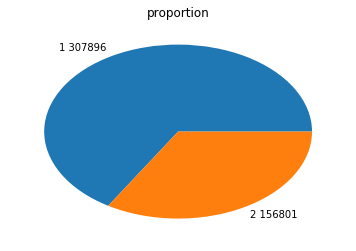

In [121]:
_.pie()

As our expectation, in urban area accident happened more than in rural area.

In [122]:
%%sql
SELECT t1.urban_or_rural, t1.severity, t1.frequency, CAST(t1.frequency AS FLOAT) / CAST(t2.urban_rural_frequency AS FLOAT) AS proportion
FROM (
    SELECT location.urban_or_rural AS urban_or_rural, accidents.severity AS severity, COUNT(*) AS frequency
    FROM accidents
    JOIN location
    ON accidents.location_key = location.location_key
    GROUP BY location.urban_or_rural, accidents.severity
    ORDER BY location.urban_or_rural, accidents.severity
    ) AS t1
JOIN (
    SELECT location.urban_or_rural AS urban_or_rural, COUNT(*) AS urban_rural_frequency
    FROM accidents 
    JOIN location 
    ON accidents.location_key = location.location_key 
    GROUP BY location.urban_or_rural
    ) AS t2
ON t1.urban_or_rural = t2.urban_or_rural

 * postgresql://student@/project4
6 rows affected.


urban_or_rural,severity,frequency,proportion
1,1,1997,0.00648595629693143
1,2,40258,0.130751942214254
1,3,265641,0.862762101488814
2,1,3306,0.0210840492088698
2,2,26526,0.169169839478065
2,3,126969,0.809746111313066


In [129]:
Image(url="https://i.ibb.co/sCtbRp0/U-R.png")

As the table and plot shown above, we can see low severity(3) accidents occured more in urban area than in rural area. Severity of serious(2) and fatal(1) occured more in rural area than in urban area. Although accident frequency is higher in urban area than in rural area, serious and fatal accidents happened more in rural rathar than in urban area.

We presume that the reason may be that people tend to drive faster in rural area because there are less vehicles and more space, which lead to more severe accidents.

## Analysis 7
## Top 10 regions where have most accidents

In [123]:
%%sql
SELECT location.region, COUNT(*) FROM accidents
JOIN location
ON accidents.location_key = location.location_key
AND location.region NOT LIKE '%unknown%'
GROUP BY location.region
ORDER BY COUNT(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


region,count
Birmingham,7017
Leeds,5702
Westminster,4534
Liverpool,4272
Cheshire East,4077
County Durham,3903
Wandsworth,3866
Bradford,3855
Cornwall,3853
Ealing,3804


In [124]:
%%sql
SELECT location.region FROM accidents
    JOIN location
    ON accidents.location_key = location.location_key
    AND location.region NOT LIKE '%unknown%'
    GROUP BY location.region
    ORDER BY COUNT(*) DESC
    LIMIT 10

 * postgresql://student@/project4
10 rows affected.


region
Birmingham
Leeds
Westminster
Liverpool
Cheshire East
County Durham
Wandsworth
Bradford
Cornwall
Ealing


NOTE: the assigned value 'unknown' is null value so we exclude it.

According to the table, Birmingham has most accidents, followed by Leeds, Westminster, Liverpool, Cheshire East, County Durham, Wandsworth, Bradford, Cornwall and Ealing.

## Analysis 7 Extension 
## The distribution of road type in top 10 regions where have the higher frequency of accidents

#### Expectation: 'Slip road' and 'Roundabout' have more accidents

In [129]:
%%sql
SELECT  road.road_type , COUNT(*) 
FROM accidents
JOIN road
ON accidents.road_key = road.road_key
JOIN location
ON accidents.location_key = location.location_key
WHERE location.region IN (
    SELECT location.region FROM accidents
    JOIN location
    ON accidents.location_key = location.location_key
    AND location.region NOT LIKE '%unknown%'
    GROUP BY location.region
    ORDER BY COUNT(*) DESC
    LIMIT 10
)
GROUP BY road.road_type
ORDER BY COUNT(*) DESC

 * postgresql://student@/project4
6 rows affected.


road_type,count
Single carriageway,34173
Dual carriageway,6911
Roundabout,2463
One way street,970
Slip road,304
Unknown,62


Contrary to our expectation, single carriage way has most accidents in the top 10 cities having most accidents.

Government needs to pay more attention to single carriageway in the top 10 cities having most accidents.

In [130]:
%%sql
SELECT  road.road_type , ROUND(AVG(accidents.number_casualties),2) AS avg_casualties
FROM accidents
JOIN road
ON accidents.road_key = road.road_key
JOIN location
ON accidents.location_key = location.location_key
WHERE location.region IN (
    SELECT location.region FROM accidents
    JOIN location
    ON accidents.location_key = location.location_key
    AND location.region NOT LIKE '%unknown%'
    GROUP BY location.region
    ORDER BY COUNT(*) DESC
    LIMIT 10
)
GROUP BY road.road_type
ORDER BY avg_casualties DESC

 * postgresql://student@/project4
6 rows affected.


road_type,avg_casualties
Dual carriageway,1.50
Slip road,1.49
Single carriageway,1.34
Roundabout,1.28
One way street,1.20
Unknown,1.19


Dual carriageway has the highest average number of casualties.

## Analysis 8
## Distribution of accidents in different speed limit

#### Expectation: intermediate speed limit has most accidents. Generally, in the road with high-speed limit such as high-speed railway, people tend to pay more attention to driving. As for the road with low-speed limit, it is hard that accident in the road with low-speed limit occurs and some roads with that speed limit means that road could occur accidents frequently in the past, so people may pay fine with high value when they exceed the speed limit.

In [131]:
%%sql
SELECT road.speed_limit, COUNT(*) FROM accidents
JOIN road
ON accidents.road_key = road.road_key
GROUP BY road.speed_limit
ORDER BY road.speed_limit;

 * postgresql://student@/project4
7 rows affected.


speed_limit,count
10,1
20,9055
30,304842
40,37538
50,17312
60,64465
70,31484


<BarContainer object of 7 artists>

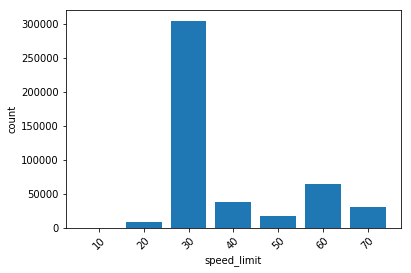

In [132]:
_.bar()

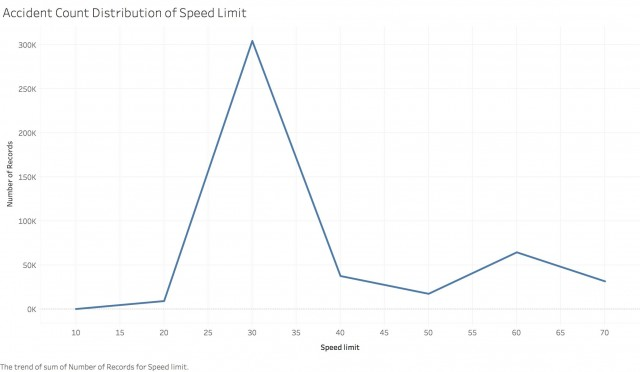

In [133]:
from IPython.display import Image
Image("https://i.ibb.co/qC39K1Q/Sheet-9.jpg")

As we can see, accidents occured most frequently when the speed limit is 30. We consider this result mataches with our expectation.

# Bonus Augment

Sometimes the most value can be gained from one dataset when it is studied alongside data drawn from other sources. Identify and describe at least one additional data source that can complement your analysis. Pull this additional data into your chosen environment and explore at least one more theme you are able to further analyze that depends upon a combination of data from both sources.

In part 2, we have added another dataset to locate accidents in specific regions. In addition to that, we want to add another new dataset that shows total traffic volume in specifc region in specific year.

This dataset is also from kaggle. This dataset is named 'ukTrafficAADF.csv' and is about UK annual average daily traffic estimates for major roadways, 2000 to 2016.

Data Link: https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales#accidents_2005_to_2007.csv

After adding this new dataset, we can find the accident rate in specific region.

In [134]:
!wget https://s3.amazonaws.com/istm/ukTrafficAADF.csv

--2018-12-10 00:39:18--  https://s3.amazonaws.com/istm/ukTrafficAADF.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.160.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.160.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55504514 (53M) [text/csv]
Saving to: ‘ukTrafficAADF.csv’

ukTrafficAADF.csv   100%[===================>]  52.93M  61.1MB/s    in 0.9s    

2018-12-10 00:39:19 (61.1 MB/s) - ‘ukTrafficAADF.csv’ saved [55504514/55504514]



### Extract the infomation we want in this dataset: AADFYear (year), LocalAuthority (region), and AllMotorVehicles(traffic volume)

In [135]:
AADFdata = pd.read_csv('ukTrafficAADF.csv')

In [136]:
AADFdata.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [137]:
AADF = AADFdata.loc[:,['AADFYear','LocalAuthority','AllMotorVehicles']]

In [138]:
AADF.head()

,AADFYear,LocalAuthority,AllMotorVehicles
0,2000,Rotherham,111146
1,2000,Leeds,65939
2,2000,Doncaster,40229
3,2000,Calderdale,85759
4,2000,Leeds,98487


In [139]:
AADF.count()

AADFYear            275385
LocalAuthority      275385
AllMotorVehicles    275385
dtype: int64

Transform the data to csv file.

In [140]:
AADF.to_csv('AADF.csv', index = None)

#### Create table AADF and insert value from the csv file

In [141]:
%%sql
DROP TABLE IF EXISTS AADF;

CREATE TABLE AADF(
    Year NUMERIC,
    Region VARCHAR(100),
    Volume NUMERIC
)

 * postgresql://student@/project4
Done.
Done.


[]

#### Note: if you get error 'cannot allocate memory', please change to another path.

In [143]:
!cp AADF.csv /tmp/AADF.csv

OSError: [Errno 12] Cannot allocate memory

In [96]:
%%sql
COPY AADF
FROM '/tmp/AADF.csv'
CSV
HEADER;

 * postgresql://student@/project4
(psycopg2.OperationalError) could not open file "/tmp/AADF.csv" for reading: No such file or directory
 [SQL: "COPY AADF\nFROM '/tmp/AADF.csv'\nCSV\nHEADER;"] (Background on this error at: http://sqlalche.me/e/e3q8)


In [97]:
%%sql
SELECT year, region, SUM(volume) FROM AADF
GROUP BY year, region
ORDER BY year, region
LIMIT 5;

 * postgresql://student@/project4
0 rows affected.


year,region,sum


#### Create new table AADF_volume and extract value from table AADF that its year is from 2012 to 2014

In [152]:
%%sql
DROP TABLE IF EXISTS AADF_volume;

CREATE TABLE AADF_volume(
    Year NUMERIC,
    Region VARCHAR(100),
    Volume NUMERIC
)

 * postgresql://student@/project4
Done.
Done.


[]

In [153]:
%%sql
INSERT INTO AADF_volume (year, region, volume)
SELECT year, region, SUM(volume) FROM AADF
WHERE year IN (2012,2013,2014)
GROUP BY year, region
ORDER BY year, region

 * postgresql://student@/project4
570 rows affected.


[]

### Now, we want to find the traffic accident rate from the top 10 cities where happen accdients the most

In analysis 7, we have already finded the top 10 cities where happen accdients the most. The table is below.

In [155]:
%%sql
SELECT location.region, COUNT(*) FROM accidents
JOIN location
ON accidents.location_key = location.location_key
AND location.region NOT LIKE '%unknown%'
GROUP BY location.region
ORDER BY COUNT(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


region,count
Birmingham,7017
Leeds,5702
Westminster,4534
Liverpool,4272
Cheshire East,4077
County Durham,3903
Wandsworth,3866
Bradford,3855
Cornwall,3853
Ealing,3804


Next, we want to find whether there are regions in top 10 that cannot be found in our AADF_volume table.

In [156]:
%%sql
SELECT DISTINCT AADF_volume.region FROM AADF_volume
JOIN location ON AADF_volume.region = location.region
WHERE AADF_volume.region IN (  
                    'Birmingham',
                    'Leeds',
                    'Westminster',
                    'Liverpool',
                    'Cheshire East',
                    'County Durham',
                    'Wandsworth',
                    'Bradford',
                    'Cornwall',
                    'Ealing')

 * postgresql://student@/project4
7 rows affected.


region
Westminster
Leeds
Birmingham
Liverpool
Wandsworth
Ealing
Bradford


We cannot find Cornwall,Cheshire East, and County Durham in AADF_volume table.

#### Next, find the relationship between traffic volume and accident frequency in top 7 cities having most accidents. The table will be ordered by total traffic volume descendingly in each year

In [157]:
%%sql
SELECT t1.year, t1.region, t2.total_volume AS total_traffic_volume , t1.accident_frequency,CAST(t1.accident_frequency AS FLOAT) / CAST(t2.total_volume AS FLOAT) AS rate


FROM(
        SELECT  date.year AS year, location.region AS region, COUNT(*) AS accident_frequency
        FROM accidents 
        JOIN road ON accidents.road_key = road.road_key
        JOIN location ON accidents.location_key = location.location_key
        JOIN date ON accidents.date_key = date.date_key
        JOIN AADF_volume ON AADF_volume.region = location.region
        WHERE location.region IN (
            SELECT location.region FROM accidents
            JOIN location
            ON accidents.location_key = location.location_key
            AND location.region NOT LIKE '%unknown%'
            GROUP BY location.region
            ORDER BY COUNT(*) DESC
            LIMIT 10
        )
        GROUP BY date.year, location.region
        ORDER BY year, region
     ) AS t1
JOIN(
        SELECT  date.year AS year, location.region AS region, SUM(AADF_volume.volume) AS total_volume
        FROM accidents 
        JOIN road ON accidents.road_key = road.road_key
        JOIN location ON accidents.location_key = location.location_key
        JOIN date ON accidents.date_key = date.date_key
        JOIN AADF_volume ON AADF_volume.region = location.region
        WHERE location.region IN (
            SELECT location.region FROM accidents
            JOIN location
            ON accidents.location_key = location.location_key
            AND location.region NOT LIKE '%unknown%'
            GROUP BY location.region
            ORDER BY COUNT(*) DESC
            LIMIT 10
        )
        GROUP BY date.year, location.region
        ORDER BY year, region
     ) AS t2
ON t1.year = t2.year
AND t1.region = t2.region
ORDER BY t1.year ASC, t2.total_volume DESC

 * postgresql://student@/project4
21 rows affected.


year,region,total_traffic_volume,accident_frequency,rate
2012,Leeds,36729310527,6201,1.68829741452446e-07
2012,Birmingham,25915199008,5856,2.25967780459346e-07
2012,Liverpool,18722797884,6426,3.43217933548889e-07
2012,Westminster,11588692848,4272,3.68635190873772e-07
2012,Bradford,9881659500,4500,4.55389097347465e-07
2012,Wandsworth,9727991910,5805,5.96731581780273e-07
2012,Ealing,8132328480,5436,6.68443240256326e-07
2013,Birmingham,32327617615,7305,2.25967780459346e-07
2013,Leeds,30616643463,5169,1.68829741452446e-07
2013,Westminster,12369953040,4560,3.68635190873772e-07


We cannot see clearly the relationship, so we decide to expand our sample and plot scatter plot.

#### We extract result in year 2012 and export to csv file so that we can use seaborn.regplot to plot the scatter plot as well as best-fitting line

In [158]:
%%sql
Copy (
SELECT t2.total_volume AS total_traffic_volume , t1.accident_frequency


FROM(
        SELECT  date.year AS year, location.region AS region, COUNT(*) AS accident_frequency
        FROM accidents 
        JOIN road ON accidents.road_key = road.road_key
        JOIN location ON accidents.location_key = location.location_key
        JOIN date ON accidents.date_key = date.date_key
        JOIN AADF_volume ON AADF_volume.region = location.region
        WHERE location.region IN (
            SELECT location.region FROM accidents
            JOIN location
            ON accidents.location_key = location.location_key
            AND location.region NOT LIKE '%unknown%'
            GROUP BY location.region
            ORDER BY COUNT(*) DESC
            LIMIT 200
        )
        GROUP BY date.year, location.region
        ORDER BY year, region
     ) AS t1
JOIN(
        SELECT  date.year AS year, location.region AS region, SUM(AADF_volume.volume) AS total_volume
        FROM accidents 
        JOIN road ON accidents.road_key = road.road_key
        JOIN location ON accidents.location_key = location.location_key
        JOIN date ON accidents.date_key = date.date_key
        JOIN AADF_volume ON AADF_volume.region = location.region
        WHERE location.region IN (
            SELECT location.region FROM accidents
            JOIN location
            ON accidents.location_key = location.location_key
            AND location.region NOT LIKE '%unknown%'
            GROUP BY location.region
            ORDER BY COUNT(*) DESC
            LIMIT 200
        )
        GROUP BY date.year, location.region
        ORDER BY year, region
     ) AS t2
ON t1.year = t2.year
AND t1.region = t2.region
WHERE t1.year = 2012
ORDER BY t1.year ASC, t2.total_volume DESC


) To '/tmp/test.csv' With CSV DELIMITER ',';

 * postgresql://student@/project4
106 rows affected.


[]

In [159]:
test = pd.read_csv('/tmp/test.csv', header = None)

In [160]:
test.columns = ['traffic volume','accident']

In [161]:
test.head()

,traffic volume,accident
0,36729310527,6201
1,25915199008,5856
2,21727641728,4992
3,18722797884,6426
4,17006856680,5748


The result are exported correctly.

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

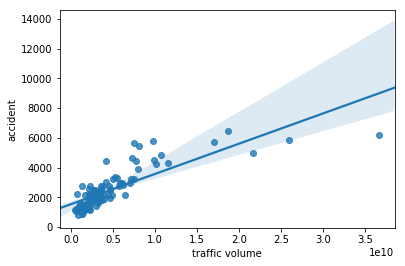

In [163]:
plt.clf()
plot = sns.regplot('traffic volume','accident',data = test)
plot.set(xlabel='traffic volume', ylabel='accident')
plt.show()

As we can see, there is a positive relationship between traffic volume and accident frequency. The higher the traffic volume, the higher the accident frequency.

# Participation

All team members have contributed substantially and meaningfully to our project.

Guangzhe Zhu: Focused on Part 3 analysis and Part 2 schema design, also helped to review and modify the final result.

Jiaqi Chen: Focused on Part 1 initial data exploration and Part 2, also helped to review and modify the final result.

Wenyu Wang: Focused on schema design, Part 3 analysis and Bonus, also helped to review and modify the final result.

Yingbing Zhu: Focused on Part 2 wrangling and Part 3, also helped to review and modify the final results.